In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.cluster import KMeans
from sklearn.svm import SVC

# Load the dataset
df = pd.read_csv("data_moods.csv")
df_cleaned = df.drop(columns=['id', 'album', 'artist', 'release_date'])

In [2]:
# Show the first 5 rows
print("First 5 rows:")
print(df_cleaned.head())

First 5 rows:
                                          name  popularity  length  \
0                                         1999          68  379266   
1                                           23          43  318800   
2                                     9 Crimes          60  217946   
3                               99 Luftballons           2  233000   
4  A Boy Brushed Red Living In Black And White          60  268000   

   danceability  acousticness  energy  instrumentalness  liveness  valence  \
0         0.866       0.13700   0.730          0.000000    0.0843    0.625   
1         0.381       0.01890   0.832          0.196000    0.1530    0.166   
2         0.346       0.91300   0.139          0.000077    0.0934    0.116   
3         0.466       0.08900   0.438          0.000006    0.1130    0.587   
4         0.419       0.00171   0.932          0.000000    0.1370    0.445   

   loudness  speechiness    tempo  key  time_signature       mood  
0    -8.201       0.0767  11

In [3]:

# Display basic info about the dataset
print("\nDataset Info:")
print(df_cleaned.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              686 non-null    object 
 1   popularity        686 non-null    int64  
 2   length            686 non-null    int64  
 3   danceability      686 non-null    float64
 4   acousticness      686 non-null    float64
 5   energy            686 non-null    float64
 6   instrumentalness  686 non-null    float64
 7   liveness          686 non-null    float64
 8   valence           686 non-null    float64
 9   loudness          686 non-null    float64
 10  speechiness       686 non-null    float64
 11  tempo             686 non-null    float64
 12  key               686 non-null    int64  
 13  time_signature    686 non-null    int64  
 14  mood              686 non-null    object 
dtypes: float64(9), int64(4), object(2)
memory usage: 80.5+ KB
None


In [4]:
# Check for missing values
print("\nMissing values:")
print(df_cleaned.isnull().sum())


Missing values:
name                0
popularity          0
length              0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
valence             0
loudness            0
speechiness         0
tempo               0
key                 0
time_signature      0
mood                0
dtype: int64


In [5]:
# Show unique moods and their counts
print("\nMood distribution:")
print(df_cleaned['mood'].value_counts())


Mood distribution:
mood
Sad          197
Calm         195
Energetic    154
Happy        140
Name: count, dtype: int64


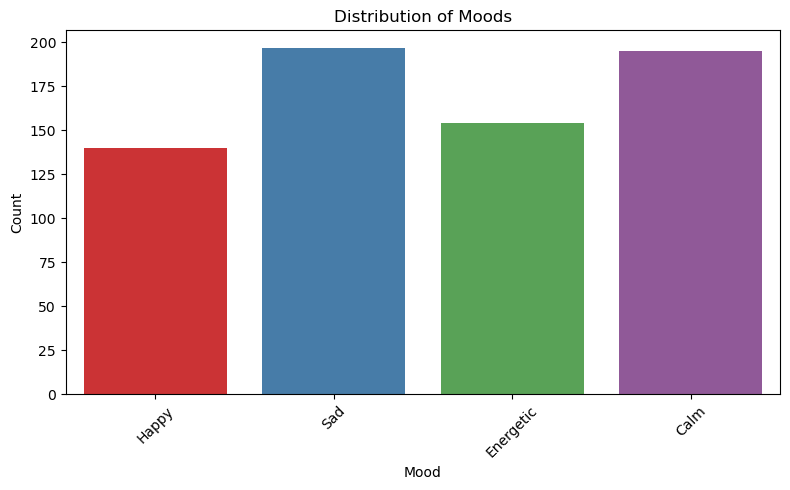

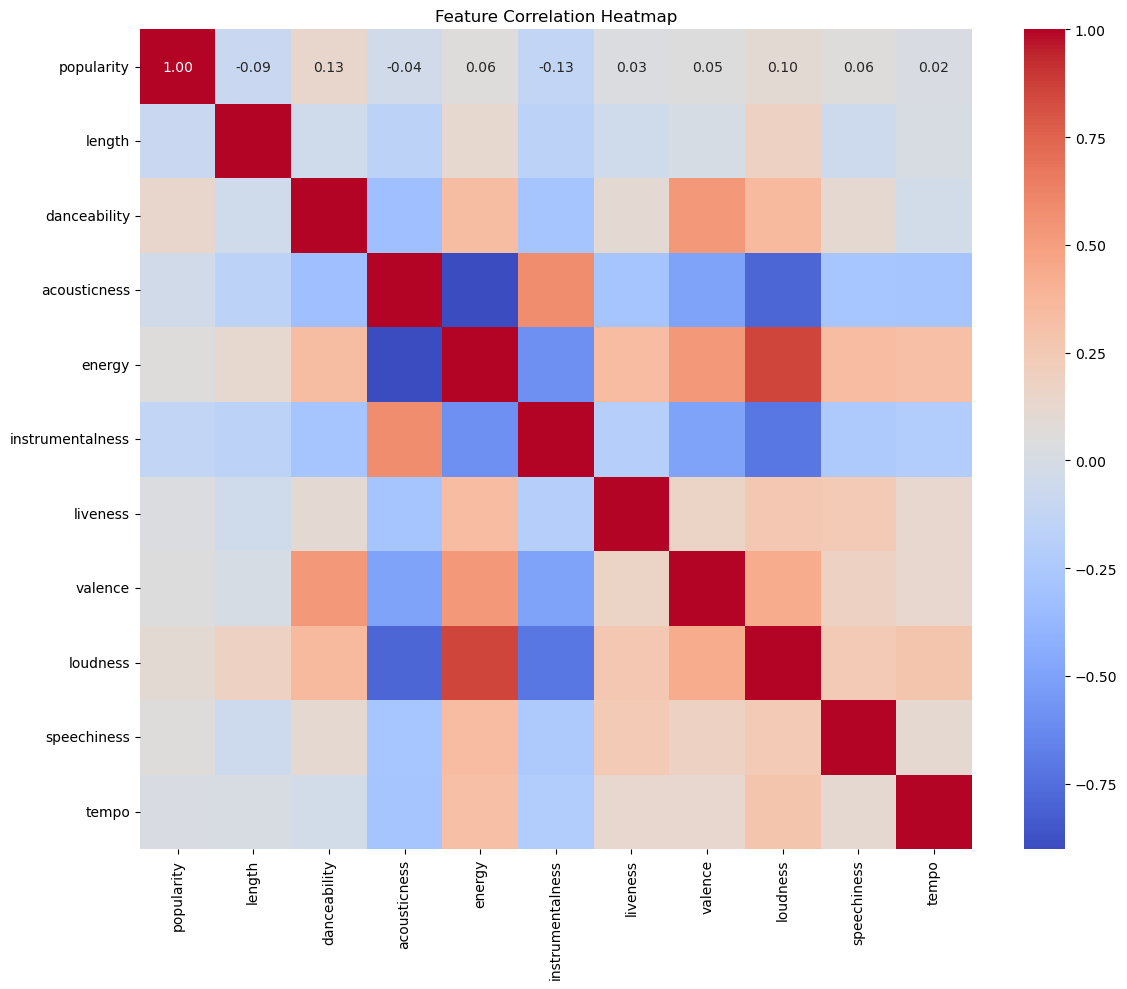

In [6]:

# Mood distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x='mood', palette='Set1')
plt.title('Distribution of Moods')
plt.xlabel('Mood')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
corr = df_cleaned.drop(columns=['key', 'time_signature']).select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()


In [7]:
le = LabelEncoder()
df_cleaned['mood'] = le.fit_transform(df_cleaned['mood'])

X = df_cleaned.drop(columns=['name', 'mood'])
y = df_cleaned['mood']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

# PREDICTING.....
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.8333333333333334
Classification Report:
               precision    recall  f1-score   support

        Calm       1.00      0.98      0.99        41
   Energetic       0.69      0.78      0.74        32
       Happy       0.57      0.52      0.54        25
         Sad       0.95      0.93      0.94        40

    accuracy                           0.83       138
   macro avg       0.80      0.80      0.80       138
weighted avg       0.84      0.83      0.83       138



In [8]:
le = LabelEncoder()
df_cleaned['mood'] = le.fit_transform(df_cleaned['mood'])

# Features and labels
X = df_cleaned.drop(columns=['name', 'mood'])
y = df_cleaned['mood']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


svm_model = SVC(kernel='poly', C=1.0, gamma='scale')  # You can also try 'linear' or 'poly'
svm_model.fit(X_train, y_train)

#  PREDICTING.....
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.39855072463768115


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TypeError: object of type 'numpy.int32' has no len()

In [9]:
df = df.drop(columns=['id', 'album', 'artist', 'release_date', 'name', 'mood'])

df['popularity_label'] = df['popularity'].apply(lambda x: 1 if x > 60 else 0)

X = df.drop(columns=['popularity', 'popularity_label'])
y = df['popularity_label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# PREDICTING.....
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred, target_names=["Not Popular", "Popular"]))


Accuracy: 0.7898550724637681
Report:
               precision    recall  f1-score   support

 Not Popular       0.84      0.93      0.88       117
     Popular       0.00      0.00      0.00        21

    accuracy                           0.79       138
   macro avg       0.42      0.47      0.44       138
weighted avg       0.71      0.79      0.75       138



In [10]:
def predict_popularity(features_dict):
    import numpy as np

    
    feature_order = X.columns
    values = [features_dict[feat] for feat in feature_order]

    
    scaled_values = scaler.transform([values])
    pred = clf.predict(scaled_values)
    return "Popular" if pred[0] == 1 else "Not Popular"


ss = {
    "length": 369574,
    "danceability": 0.7510,
    "acousticness": 0.0481,
    "energy": 0.708,
    "instrumentalness": 1.83e-05,
    "liveness": 0.107,
    "valence": 0.509,
    "loudness": -5.645,
    "speechiness": 0.0545,
    "tempo": 108.97,
    "key": 0,
    "time_signature": 4
}
print("Prediction:", predict_popularity(ss))


Prediction: Popular


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
